# Data Visualisation

## Import Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import copy
import math

## Import Data

In [2]:
demand_df = pd.read_csv('demand.csv', parse_dates=['Date'])
demand_df.tail()

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
148805,2020-09-30 22:45:00,96.9,14.4,389.0,NaN,NaN,35.6,29.67,6.68,6.34,5.49,4.55,25.28
148806,2020-09-30 23:00:00,96.9,18.8,389.0,1.0,NaN,38.6,29.94,6.71,6.39,5.65,4.57,25.30
148807,2020-09-30 23:15:00,37.4,4.5,415.0,NaN,NaN,38.6,34.02,8.13,7.71,6.83,5.32,28.62
148808,2020-09-30 23:30:00,37.4,9.6,415.0,NaN,NaN,38.6,38.10,9.55,9.03,8.02,6.08,31.94
148809,2020-09-30 23:45:00,37.4,14.0,415.0,NaN,NaN,38.6,39.88,10.12,9.67,8.62,6.33,32.92


In [3]:
price_df = pd.read_csv('price.csv', parse_dates=['Date'])
price_df.head()

,Date,TOTALDEMAND,RRP
0,2020-10-01 00:30:00,4670.40,39.09
1,2020-10-01 01:00:00,4513.84,38.39
2,2020-10-01 01:30:00,4329.71,36.46
3,2020-10-01 02:00:00,4146.21,35.79
4,2020-10-01 02:30:00,4003.90,33.65


In [4]:
weather_df = pd.read_csv('weather.csv', parse_dates=['Date'])
weather_df.head()

,Date,olympic_max_temp,moorabbin_max_temp,olympic_min_temp,moorabbin_min_temp,olympic_rain,oakleigh_rain,moorabbin_rain,olympic_solar,oakleigh_solar,moorabbin_solar
0,2013-01-01,NaN,22.8,NaN,13.3,NaN,0.0,0.0,31.1,30.5,29.4
1,2013-01-02,NaN,20.5,NaN,12.6,NaN,0.0,0.0,31.9,32.8,33.0
2,2013-01-03,NaN,36.5,NaN,12.0,NaN,0.0,0.0,32.8,32.2,31.9
3,2013-01-04,NaN,41.5,NaN,18.6,NaN,0.0,0.0,33.5,33.6,33.6
4,2013-01-05,NaN,26.2,NaN,18.8,NaN,0.0,0.0,30.5,31.4,29.6


## Data Visualisation

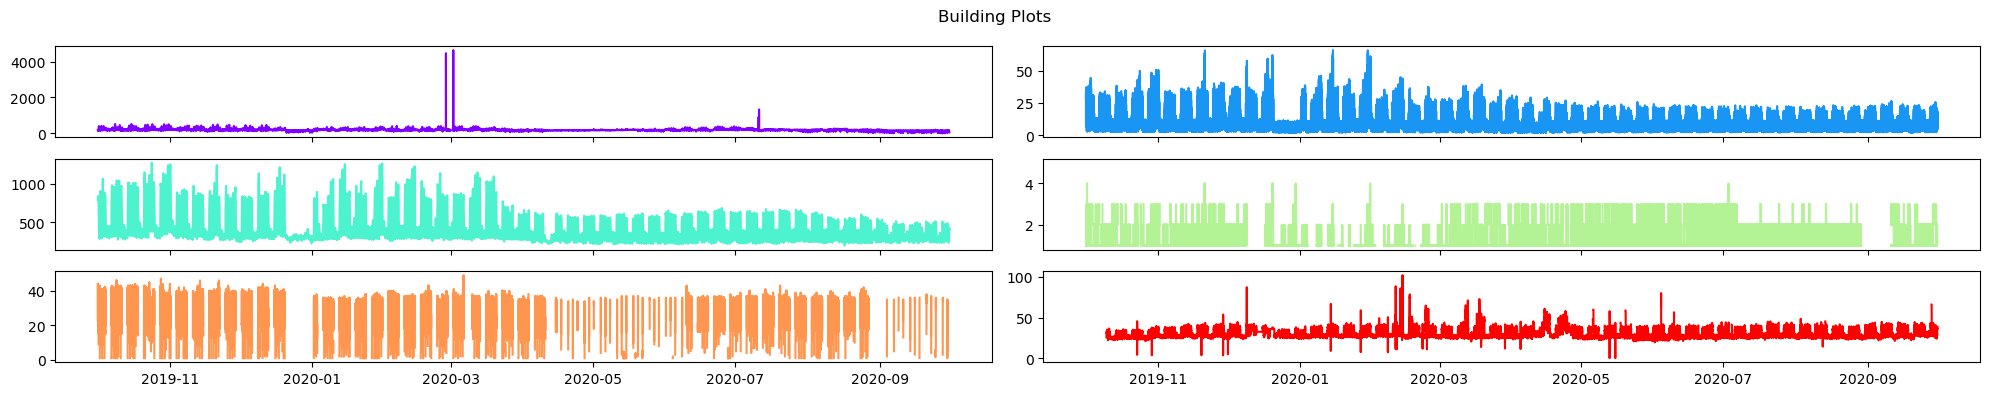

In [5]:
#Plot Building Demand

#generate start and end dates
start_date = '2019-09-30 23:45:00'
end_date = '2020-09-30 23:45:00'
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)

#create figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 4), sharex=True)
color=cm.rainbow(np.linspace(0,1,6))
for col, ax, c in zip([col for col in demand_df.columns if "Building" in col], axes.flatten(), color):
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask][col], color=c)
fig.suptitle("Building Plots")
fig.tight_layout()
plt.show()

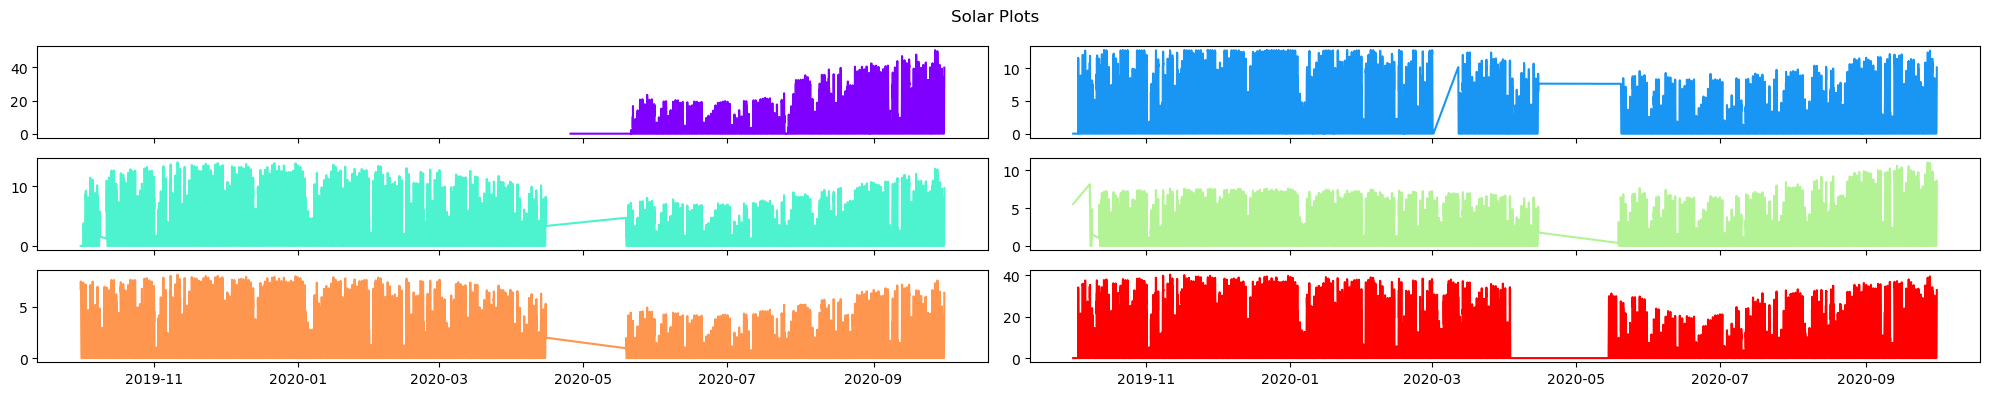

In [6]:
#Plot Solar Power

#generate start and end dates
start_date = '2019-09-30 23:45:00'
end_date = '2020-09-30 23:45:00'
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)

#create figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 4), sharex=True)
color=cm.rainbow(np.linspace(0,1,6))
for col, ax, c in zip([col for col in demand_df.columns if "Solar" in col], axes.flatten(), color):
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask][col], color=c)
fig.suptitle("Solar Plots")
fig.tight_layout()
plt.show()

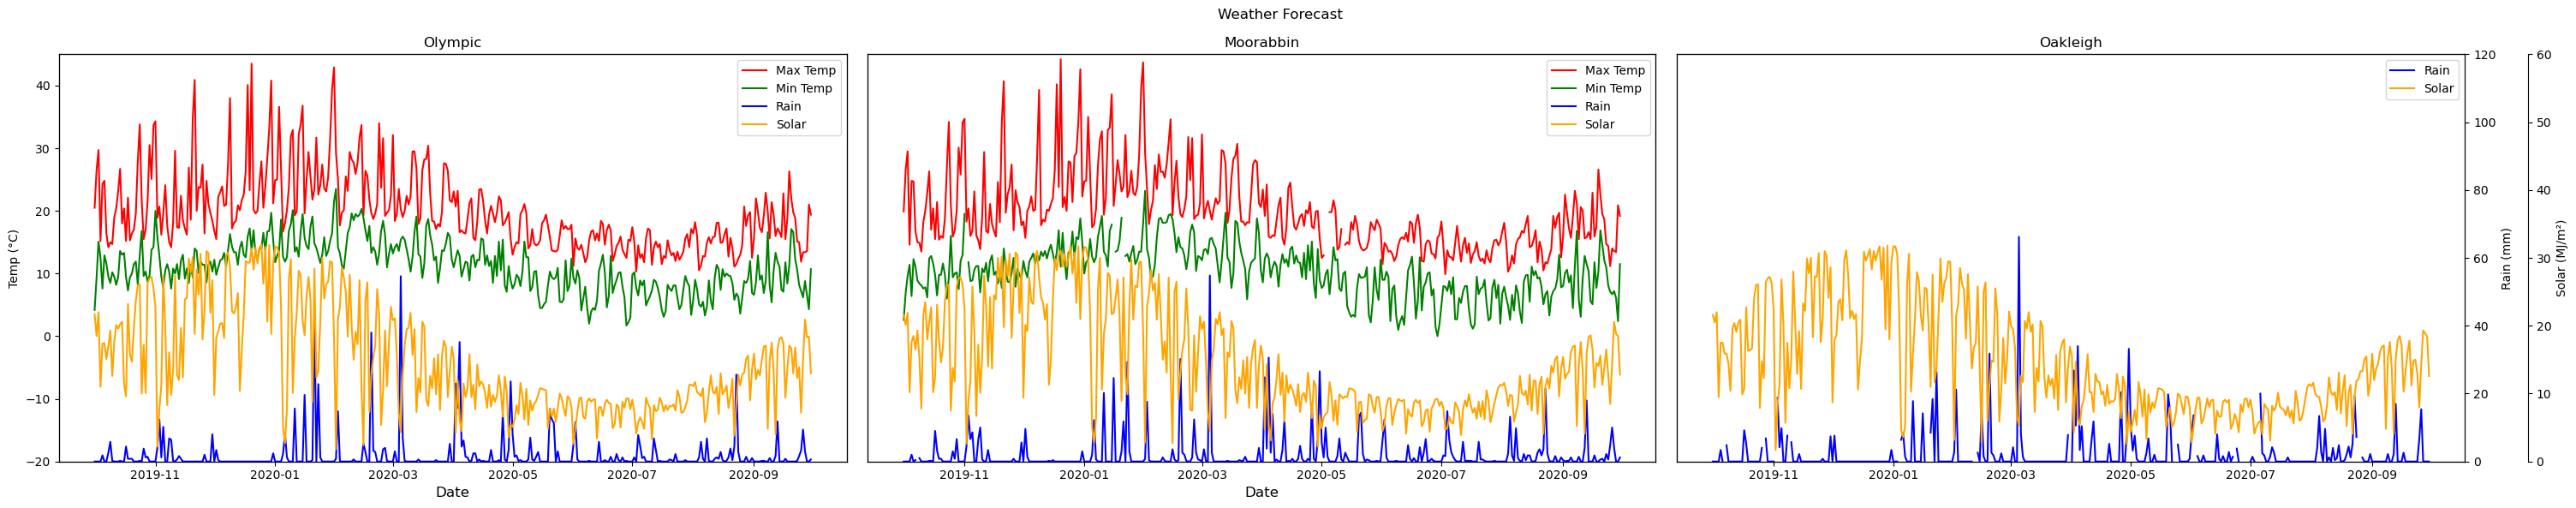

In [7]:
#Plot Weather Forecast

#generate start and end dates
start_date = '2019-09-30'
end_date = '2020-09-30'
mask = (weather_df['Date'] > start_date) & (weather_df['Date'] <= end_date)

#create figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

#olympic plot
line1 = ax[0].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_max_temp'], color='red', label="Max Temp")
line2 = ax[0].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_min_temp'], color='green', label="Min Temp")
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylim(-20, 45)

ax1 = ax[0].twinx()
line3 = ax1.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_rain'], color='blue', label="Rain")
ax1.set_ylim(0, 120)
    
ax2 = ax[0].twinx()
line4 = ax2.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['olympic_solar'], color='orange', label="Solar")
ax2.set_ylim(0, 60)

lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
ax[0].legend(lines, labels, loc='best')
ax[0].set_title("Olympic")

#moorabbin plot
line1 = ax[1].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_max_temp'], color='red', label="Max Temp")
line2 = ax[1].plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_min_temp'], color='green', label="Min Temp")
ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylim(-20, 45)

ax3 = ax[1].twinx()
line3 = ax3.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_rain'], color='blue', label="Rain")
ax3.set_ylim(0, 120)
    
ax4 = ax[1].twinx()
line4 = ax4.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['moorabbin_solar'], color='orange', label="Solar")
ax4.set_ylim(0, 60)

lines = line1+line2+line3+line4
labels = [l.get_label() for l in lines]
ax[1].legend(lines, labels, loc='best')
ax[1].set_title("Moorabbin")

#oakleigh plot
ax5 = ax[2].twinx()
line1 = ax5.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['oakleigh_rain'], color='blue', label="Rain")
ax5.set_ylim(0, 120)

ax6 = ax[2].twinx()
line2 = ax6.plot(weather_df.loc[mask]['Date'], weather_df.loc[mask]['oakleigh_solar'], color='orange', label="Solar")
ax6.spines['right'].set_position(('axes', 1.08))
ax6.set_ylim(0, 60)

lines = line1+line2
labels = [l.get_label() for l in lines]
ax[2].legend(lines, labels, loc='best')
ax[2].set_title("Oakleigh")

#format figure
ax[0].set_ylabel("Temp (°C)")
ax5.set_ylabel("Rain (mm)")
ax6.set_ylabel("Solar (MJ/m²)")
ax1.axes.yaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)
fig.suptitle('Weather Forecast')
fig.tight_layout()
plt.show()

### Smooth Peaks

In [8]:
from scipy.signal import find_peaks

In [9]:
def smooth_like_butter(peaks, ar):
    '''
    Input in a list with all the indexes that have peaks and returns an array with all 
    the indexes being smoothed by taking the mean of the previous and the next value
    '''
    arr = copy.copy(ar)
    for peak in peaks:
        i = 1
        j = 1
        while arr[peak + i] == arr[peak]:
            i += 1
        while arr[peak - j] == arr[peak]:
            j += 1
        val = (arr[peak + i] + arr[peak - j]) / 2
        arr[peak - j:peak + i] = val
    return arr

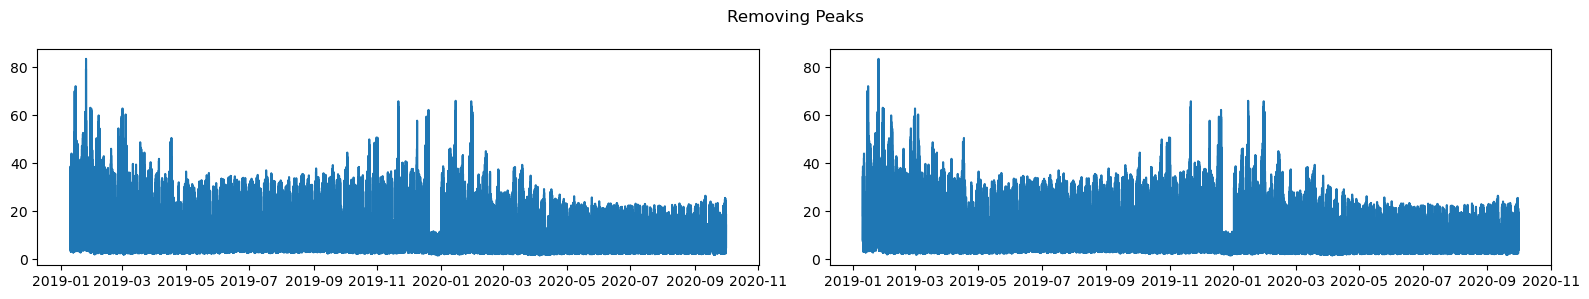

In [11]:
#Removing Peaks

#create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(16,3))

#find peaks and append to array
peaks, _ = find_peaks(demand_df['Building1'], height=100)
Building1_peaks = np.zeros(len(demand_df))
Building1_peaks[:] = np.NaN
for i in peaks:
    Building1_peaks[i] = demand_df['Building1'][i]

#plot original with peaks
axs[0].plot(demand_df['Date'], demand_df['Building1'])
axs[0].plot(demand_df['Date'], Building1_peaks, "x")

#plot after applying function
demand_df['Building1'] = smooth_like_butter(peaks, demand_df['Building1'])
axs[1].plot(demand_df['Date'], demand_df['Building1'])

fig.suptitle("Removing Peaks")
fig.tight_layout()
plt.show()

In [13]:
demand_df

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-03 21:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-03 21:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03 22:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-03 22:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-03 22:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148805,2020-09-30 22:45:00,96.9,14.4,389.0,NaN,NaN,35.6,29.67,6.68,6.34,5.49,4.55,25.28
148806,2020-09-30 23:00:00,96.9,18.8,389.0,1.0,NaN,38.6,29.94,6.71,6.39,5.65,4.57,25.30
148807,2020-09-30 23:15:00,37.4,4.5,415.0,NaN,NaN,38.6,34.02,8.13,7.71,6.83,5.32,28.62
148808,2020-09-30 23:30:00,37.4,9.6,415.0,NaN,NaN,38.6,38.10,9.55,9.03,8.02,6.08,31.94


### Fill Missing Values

number of 15 min intervals in year 1: 35040
number of 15 min intervals in year 2: 35136


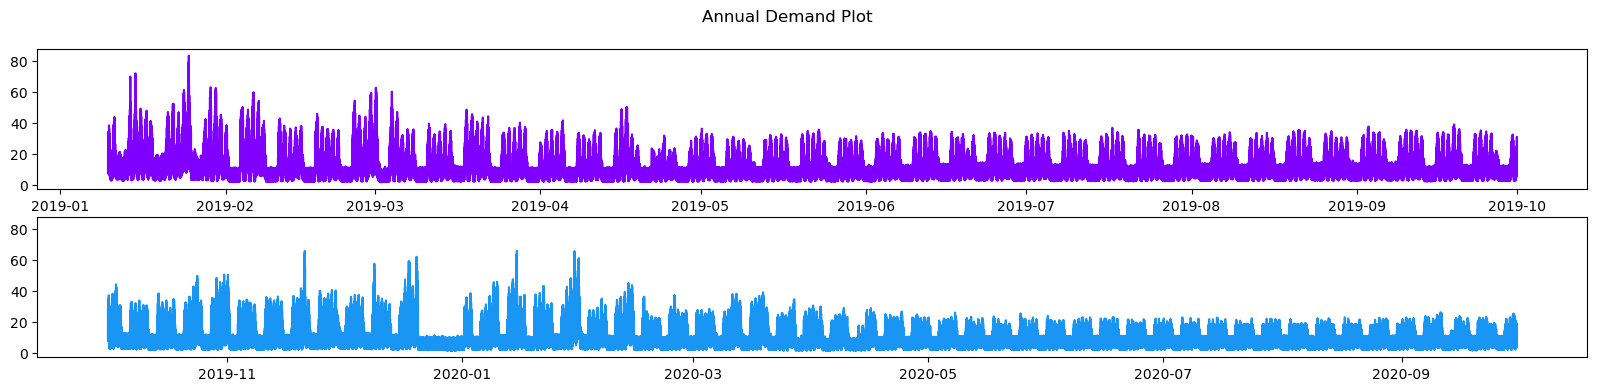

In [27]:
#create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 4), sharey=True)
color=cm.rainbow(np.linspace(0,1,6))
years = ['2018', '2019', '2020']
i = 1
building_df = pd.DataFrame()
for ax, c in zip(axes.flatten(), color):
    #generate start and end dates
    start_date = years[i-1] + '-09-30 23:45:00'
    end_date = years[i] + '-09-30 23:45:00'
    mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask]['Building1'], color=c)
    building_df['year'+str(i)] = copy.copy(demand_df.loc[mask]['Building1'].reset_index(drop=True))
    print("number of 15 min intervals in year "+str(i)+": "+str(len(demand_df.loc[mask]['Building1'])))
    i += 1
fig.suptitle("Annual Demand Plot")
plt.show()

In [28]:
building_df.head()

,year1,year2
0,NaN,28.7
1,NaN,8.9
2,NaN,16.7
3,NaN,24.8
4,NaN,32.9


In [29]:
def fill_missing(df):
    arr = []
    for col in df.columns:
        df[col] = df[col].fillna(df.mean(axis=1))
        arr += list(df[col])
    return arr

In [31]:
start_date = '2018-09-30 23:45:00'
end_date = '2020-09-29 23:45:00' #decrease 1 day due to leap year
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)
demand_df.loc[mask, 'Building1'] = fill_missing(building_df)
demand_df.head()

,Date,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-03 21:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-03 21:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03 22:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-03 22:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-03 22:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


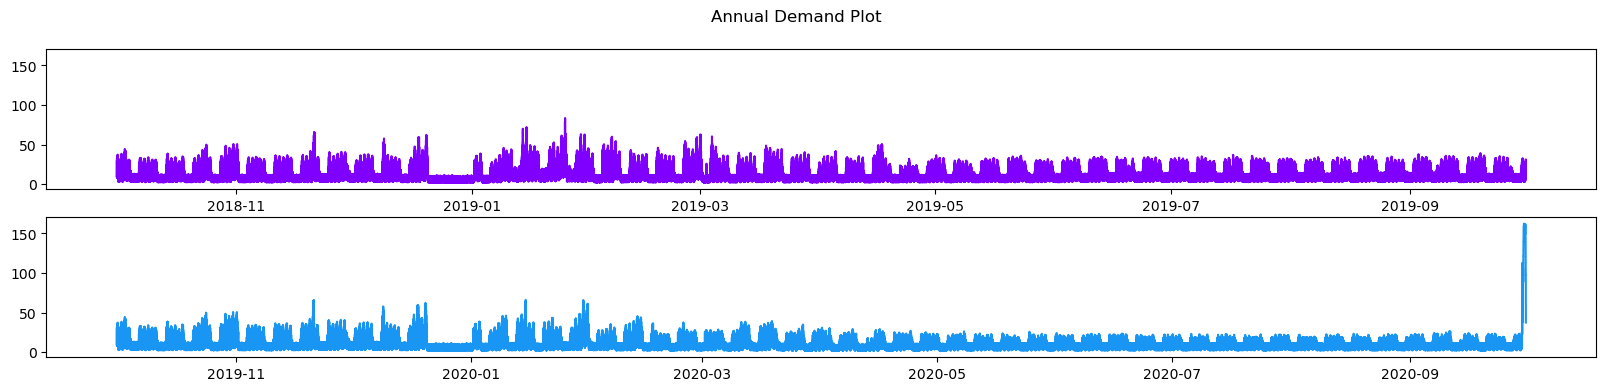

In [32]:
#create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 4), sharey=True)
color=cm.rainbow(np.linspace(0,1,6))
years = ['2018', '2019', '2020']
i = 1
for ax, c in zip(axes.flatten(), color):
    #generate start and end dates
    start_date = years[i-1] + '-09-30 23:45:00'
    end_date = years[i] + '-09-30 23:45:00'
    mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)
    ax.plot(demand_df.loc[mask]['Date'], demand_df.loc[mask]['Building0'], color=c)
    i += 1
fig.suptitle("Annual Demand Plot")
plt.show()

## SARIMA Model

ARIMA Model is simple and flexible enough to capture relationship we would see in the data and It aims to explain the autocorrelation between the data points using past data. We can decompose the ARIMA model as follow to grab the key elements of it.

__AR: Auto regression.__ This is a model that uses the dependent relationship between the data and the lagged data.

__I: Integrated.__ The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

__MA: Moving average.__ A model that uses the relationship between the observations and the residual error from the moving average model applied to lagged observations.

In [36]:
#generate start and end dates
start_date = '2018-09-30 23:45:00'
end_date = '2020-09-30 23:45:00'
mask = (demand_df['Date'] > start_date) & (demand_df['Date'] <= end_date)

ARIMA_df = demand_df.loc[mask][['Date', 'Building1']]
ARIMA_df.index = ARIMA_df['Date']
ARIMA_df = ARIMA_df.drop(['Date'], axis=1)
ARIMA_df

,Building1
Date,
2018-10-01 00:00:00,28.7
2018-10-01 00:15:00,8.9
2018-10-01 00:30:00,16.7
2018-10-01 00:45:00,24.8
2018-10-01 01:00:00,32.9
...,...
2020-09-30 22:45:00,14.4
2020-09-30 23:00:00,18.8
2020-09-30 23:15:00,4.5


### Daily SARIMA Model

In [37]:
ARIMA_df_daily = ARIMA_df.resample('D')['Building1'].sum()
ARIMA_df_daily

Date
2018-10-01    1347.8
2018-10-02    1501.4
2018-10-03    1591.9
2018-10-04    1150.6
2018-10-05     741.3
               ...  
2020-09-26     650.3
2020-09-27     743.8
2020-09-28     938.6
2020-09-29    1047.8
2020-09-30    1151.4
Freq: D, Name: Building1, Length: 731, dtype: float64

In [38]:
y_train = ARIMA_df_daily[:len(ARIMA_df_daily) - 30]
y_test = ARIMA_df_daily[len(ARIMA_df_daily) - 30:]

In [39]:
from statsmodels.tsa.stattools import adfuller

def get_stationarity(timeseries, window):
    #rolling statistics
    rolling_mean = timeseries.rolling(window=window).mean() #weekly rolling because 7 * 24 * 60 / 15
    rolling_std = timeseries.rolling(window=window).std()

    #rolling statistics plot
    plt.rcParams["figure.figsize"] = 14, 6
    original = plt.plot(timeseries, color='k', label='Original', alpha=.5)
    mean = plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    std = plt.plot(rolling_std, color='red', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show(block=False)

    #Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

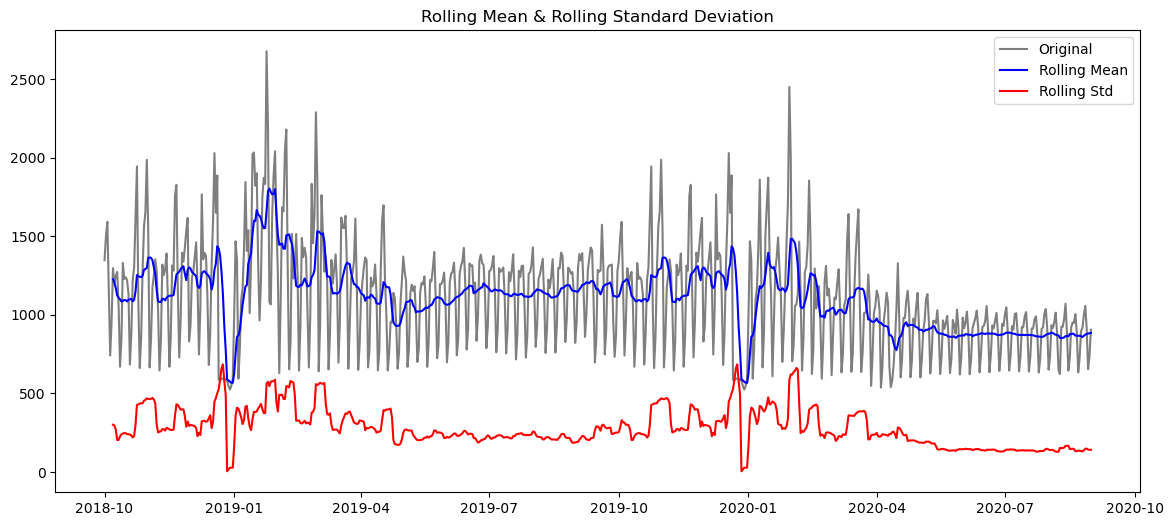

ADF Statistic: -2.6682029721423715
p-value: 0.07970400431664926
Critical Values:
	1%: -3.4400031721739515
	5%: -2.865799725091594
	10%: -2.569038427768166


In [40]:
get_stationarity(y_train, 7)

#### Training Model for Daily SARIMA

In [41]:
import statsmodels.api as sm

def run():
    model=sm.tsa.statespace.SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1,1,1,365))
    results=model.fit(method='powell', low_memory=True)
    results.save('111-111-365_sarimax_building0.pkl')
#run()

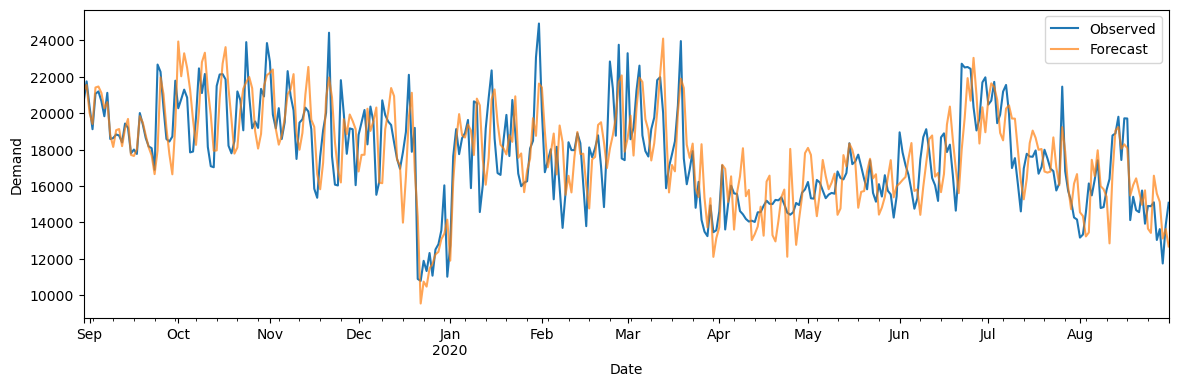

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

loaded = SARIMAXResults.load('111-111-365_sarimax_building1_daily.pkl')
pred=loaded.get_prediction(start=pd.to_datetime('2019-08-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_train['2019-08-30':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

#### Future Forecast for Daily SARIMA

In [24]:
from sklearn.metrics import mean_squared_error

y_forecasted = pred.predicted_mean
y_truth = y_train['2019-08-30':]
rmse = math.sqrt(mean_squared_error(y_truth, y_forecasted).mean())
print('The RMSE error of forecast prediction is {}'.format(round(rmse, 2)))

The RMSE error of forecast prediction is 1880.98


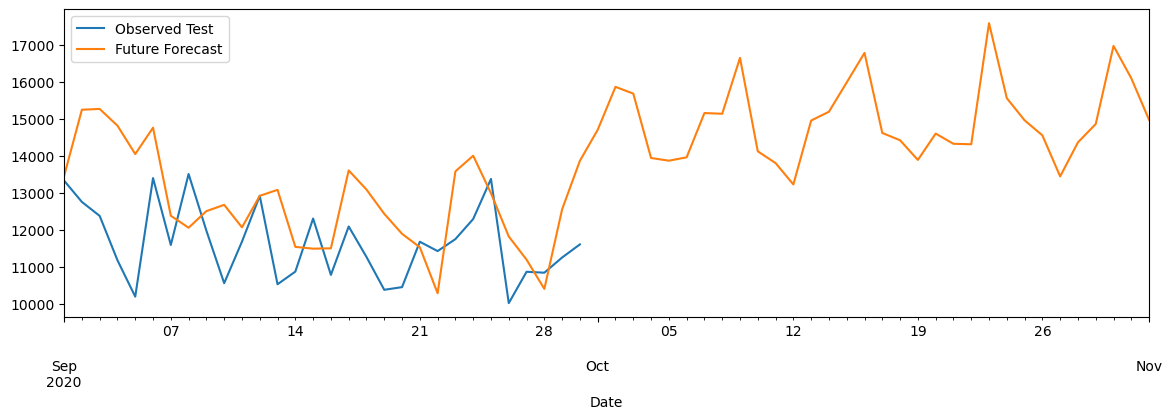

In [25]:
pred = loaded.predict(start='2020-09-01', end='2020-11-01', dynamic=False)
y_test.plot(label='Observed Test')
pred.plot(label='Future Forecast', figsize=(14, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

In [26]:
ARIMA_predictions = pd.DataFrame()
ARIMA_predictions['Building1_daily'] = pred['2020-10-01':].resample('15T').asfreq()
ARIMA_predictions = ARIMA_predictions[:'2020-10-31 23:45:00'].fillna(method='ffill')
ARIMA_predictions['Building1_daily'] = ARIMA_predictions['Building1_daily'] / 96 #there are 4 15 minute intervals * 24 hours in a day
ARIMA_predictions

,Building0_daily
2020-10-01 00:00:00,153.182230
2020-10-01 00:15:00,153.182230
2020-10-01 00:30:00,153.182230
2020-10-01 00:45:00,153.182230
2020-10-01 01:00:00,153.182230
...,...
2020-10-31 22:45:00,167.724585
2020-10-31 23:00:00,167.724585
2020-10-31 23:15:00,167.724585
2020-10-31 23:30:00,167.724585


### Hourly SARIMA Model

In [27]:
ARIMA_df['Building1_daily'] = ARIMA_df_daily.resample('15T').asfreq()
ARIMA_df = ARIMA_df.fillna(method='ffill') 
ARIMA_df['Building1_daily'] = ARIMA_df['Building1_daily'] / 96 #there are 4 15 minute intervals * 24 hours in a day
ARIMA_df['Building1_daily_diff'] = ARIMA_df['Building1'] - ARIMA_df['Building1_daily']
ARIMA_df = ARIMA_df['2019-10-01 00:00:00':]
ARIMA_df

,Building0,Building0_daily,Building0_daily_diff
Date,,,
2019-10-01 00:00:00,168.6,211.202083,-42.602083
2019-10-01 00:15:00,139.2,211.202083,-72.002083
2019-10-01 00:30:00,139.2,211.202083,-72.002083
2019-10-01 00:45:00,139.2,211.202083,-72.002083
2019-10-01 01:00:00,139.2,211.202083,-72.002083
...,...,...,...
2020-09-30 22:45:00,96.9,120.858333,-23.958333
2020-09-30 23:00:00,96.9,120.858333,-23.958333
2020-09-30 23:15:00,37.4,120.858333,-83.458333


In [28]:
ARIMA_df_hourly = ARIMA_df.resample('1H')['Building1_daily_diff'].sum()
ARIMA_df_hourly

Date
2019-10-01 00:00:00   -258.608333
2019-10-01 01:00:00   -342.308333
2019-10-01 02:00:00   -385.908333
2019-10-01 03:00:00   -385.408333
2019-10-01 04:00:00   -359.308333
                          ...    
2020-09-30 19:00:00    136.866667
2020-09-30 20:00:00    158.866667
2020-09-30 21:00:00    106.366667
2020-09-30 22:00:00    -50.033333
2020-09-30 23:00:00   -274.333333
Freq: H, Name: Building0_daily_diff, Length: 8784, dtype: float64

In [29]:
y_train = ARIMA_df_hourly[:len(ARIMA_df_hourly) - 744]
y_test = ARIMA_df_hourly[len(ARIMA_df_hourly) - 744:]

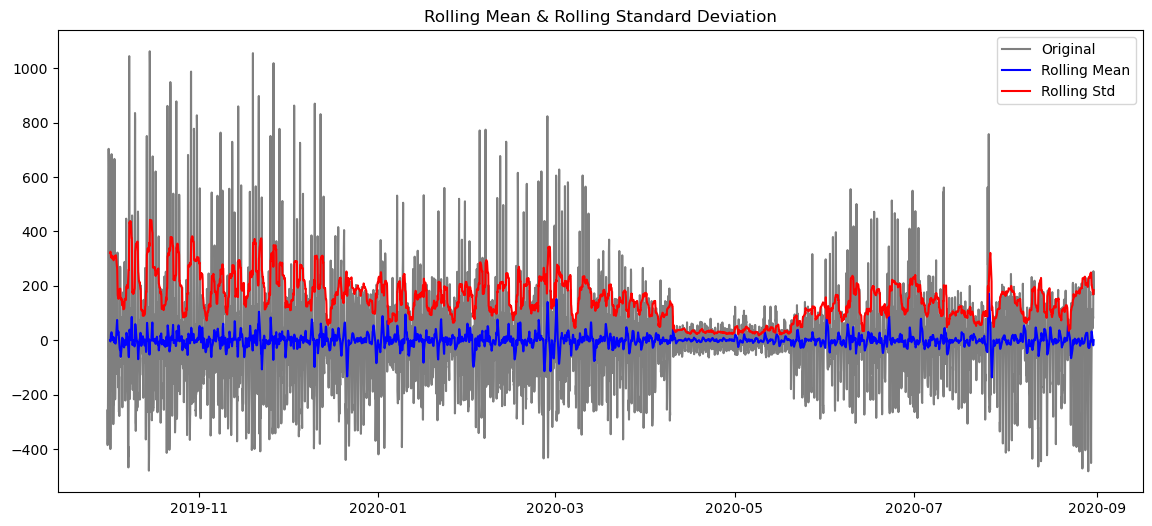

ADF Statistic: -22.157021464150823
p-value: 0.0
Critical Values:
	1%: -3.431167368324836
	5%: -2.8619012182527506
	10%: -2.5669622717722578


In [30]:
get_stationarity(y_train, 24)

#### Training Model for Hourly SARIMA

In [31]:
def run():
    model=sm.tsa.statespace.SARIMAX(y_train, order=(2, 1, 1), seasonal_order=(2,1,1,24))
    results=model.fit(method='powell', low_memory=True)
    results.save('211-211-24_sarimax_building1_hourly.pkl')
#run()

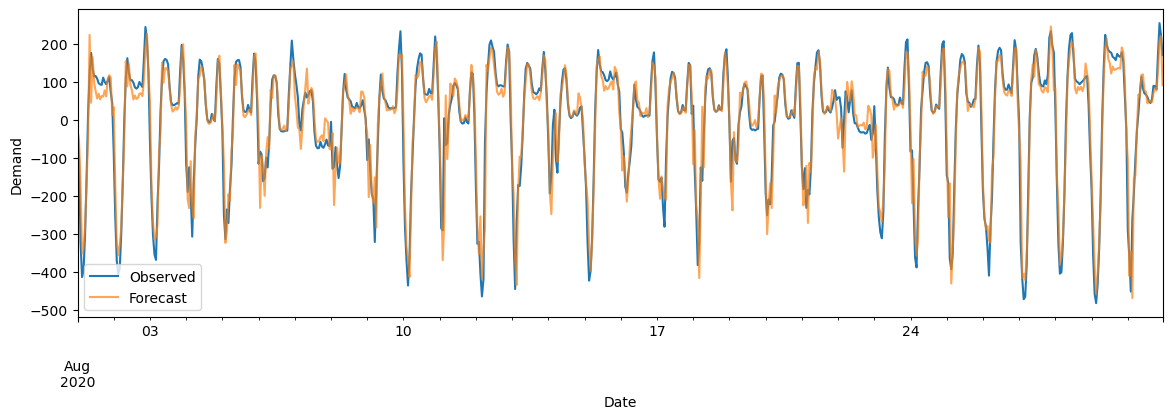

In [32]:
loaded = SARIMAXResults.load('211-211-24_sarimax_building1_hourly.pkl')
pred=loaded.get_prediction(start=pd.to_datetime('2020-08-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_train['2020-08-01':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

#### Future Forecast for Hourly SARIMA

In [33]:
y_forecasted = pred.predicted_mean
y_truth = y_train['2020-08-01':]
rmse = math.sqrt(mean_squared_error(y_truth, y_forecasted).mean())
print('The RMSE error of forecast prediction is {}'.format(round(rmse, 2)))

The RMSE error of forecast prediction is 48.36


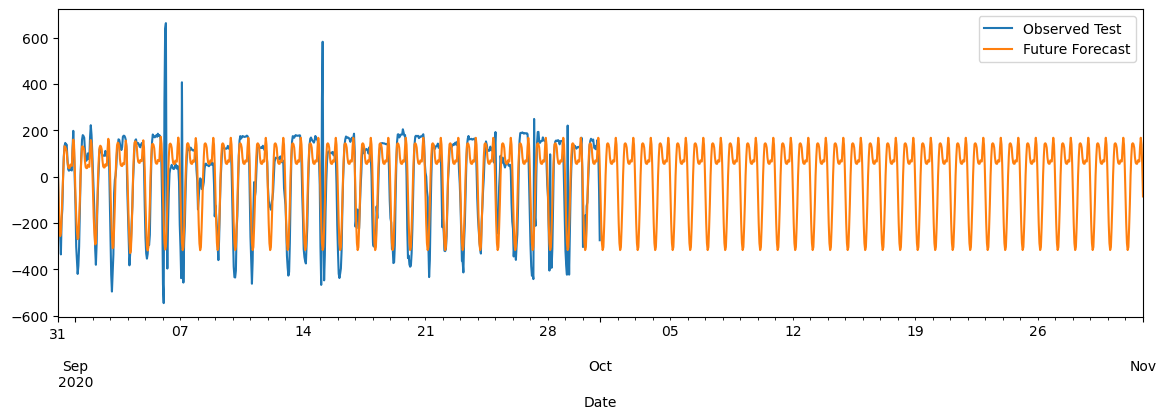

In [34]:
pred = loaded.predict(start='2020-08-31', end='2020-11-01', dynamic=False)
y_test.plot(label='Observed Test')
pred.plot(label='Future Forecast', figsize=(14, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

In [35]:
ARIMA_predictions['Building1_hourly_diff'] = pred['2020-10-01':].resample('15T').asfreq()
ARIMA_predictions = ARIMA_predictions.fillna(method='ffill') 
ARIMA_predictions['Building1_hourly_diff'] = ARIMA_predictions['Building1_hourly_diff'] / 4 #there are 4 15 minute intervals
ARIMA_predictions['Building1_pred'] = ARIMA_predictions['Building1_daily'] + ARIMA_predictions['Building1_hourly_diff']
ARIMA_predictions

,Building0_daily,Building0_hourly_diff,Building0_pred
2020-10-01 00:00:00,153.182230,-21.410476,131.771754
2020-10-01 00:15:00,153.182230,-21.410476,131.771754
2020-10-01 00:30:00,153.182230,-21.410476,131.771754
2020-10-01 00:45:00,153.182230,-21.410476,131.771754
2020-10-01 01:00:00,153.182230,-50.034570,103.147659
...,...,...,...
2020-10-31 22:45:00,167.724585,34.490042,202.214627
2020-10-31 23:00:00,167.724585,11.931439,179.656024
2020-10-31 23:15:00,167.724585,11.931439,179.656024
2020-10-31 23:30:00,167.724585,11.931439,179.656024


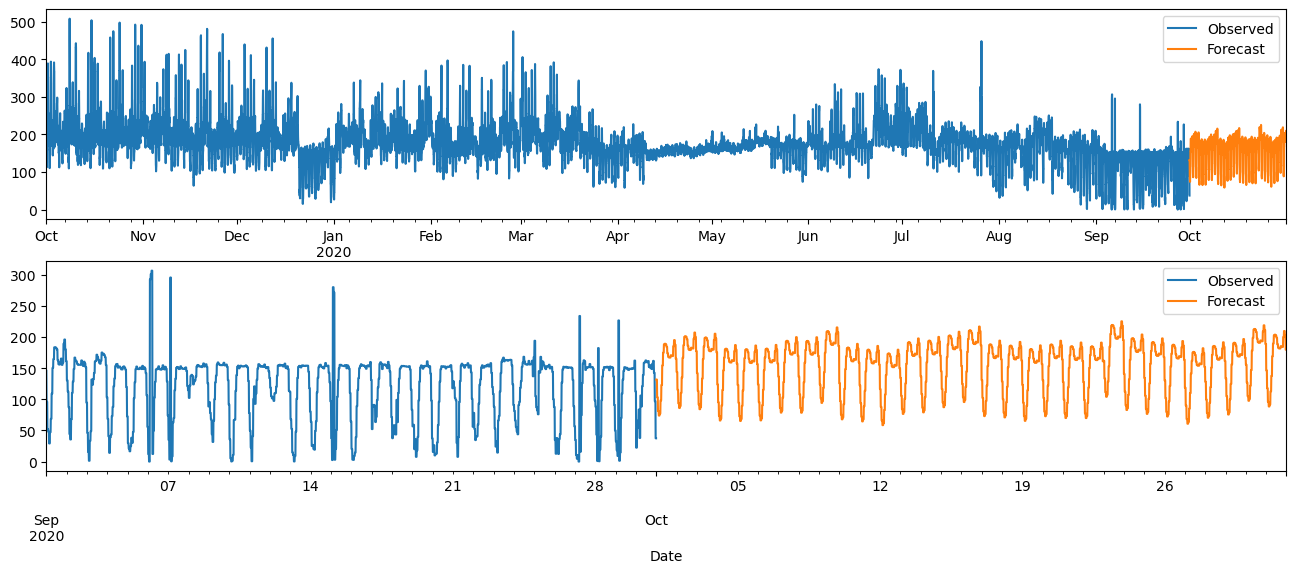

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(16, 6))
ARIMA_df['Building1'].plot(ax=axes[0], label='Observed')
ARIMA_predictions['Building1_pred'].plot(ax=axes[0], label='Forecast')
axes[0].legend()
ARIMA_df['Building1']['2020-09-01 00:00:00':].plot(ax=axes[1], label='Observed')
ARIMA_predictions['Building1_pred'].plot(ax=axes[1], label='Forecast')
axes[1].legend()
plt.show()